#EXERCISE 1. What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

#Give a 99% confidence interval for the average body temperature of healthy people.

In [ ]:
x_bar = 98.5 # sample mean
n = 130 # number of samples
sigma = 0.73 # sd of degrees
mu = 10 # Population mean

In [ ]:

To calculate the 99% confidence interval for the average body temperature of healthy people, we can use the formula:

CI = X̄ ± Z * (σ / √n)

In [1]:
import scipy.stats as stats
import math

# Given values
sample_mean = 98.25
standard_deviation = 0.73
sample_size = 130
confidence_level = 0.99

# Calculate the standard error (σ / √n)
standard_error = standard_deviation / math.sqrt(sample_size)

# Find the critical value (Z-score) corresponding to the confidence level
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the confidence interval
lower_bound = sample_mean - z_score * standard_error
upper_bound = sample_mean + z_score * standard_error

# Print the confidence interval
print(f"Confidence Interval: ({lower_bound}, {upper_bound}) degrees")


Confidence Interval: (98.08508192246582, 98.41491807753418) degrees


HYPOTHESIS TESTING

EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [ ]:
#To determine whether the company can be accused of paying substandard wages, we need to perform a hypothesis test. Let's set up the hypotheses:

#Null Hypothesis (H0): The company's average wage is equal to or greater than the industry average wage ($13.20).
#Alternative Hypothesis (H1): The company's average wage is less than the industry average wage ($13.20).





In [ ]:
# H0: mu = 13.20
# H1: mu > 13.20

In [3]:
import scipy.stats as stats

# Given values
sample_size = 40
sample_mean = 12.20
population_mean = 13.20
population_std = 2.50
alpha = 0.01

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (population_std / (sample_size**0.5))

# Calculate the p-value
p_value = stats.t.cdf(t_statistic, df=sample_size-1)

# Print the results
print("Statistic:", t_statistic)
print("P-value:", p_value)


Statistic: -2.5298221281347035
P-value: 0.0077816812266594355


In [17]:
# Compare p-value and alpha
alpha = 0.05

if p_value < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [8]:
import pandas as pd
import numpy as np
from scipy import stats

In [14]:
soil = pd.read_csv("Downloads/soil.csv")
df =soil

In [15]:
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [23]:
df = df.dropna()
df.shape

(30, 2)

In [24]:
df.describe()

,Soil1,Soil2
count,30.000000,30.000000
mean,1.691800,1.407633
std,0.206903,0.221512
min,1.110000,1.053000
25%,1.572000,1.216500
50%,1.675000,1.376000
75%,1.865250,1.553250
max,2.054000,1.878000


Null Hypothesis (H0): The average shear strength of the two types of soils is equal.
Alternative Hypothesis (H1): The average shear strength of the two types of soils is different

In [20]:
#H0: mu1 = mu2
#H1: mu1 != mu2

In [25]:
df.Soil1.mean()

1.6918000000000002

In [27]:
df.Soil2.mean()

1.407633333333333

In [30]:
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(df.Soil1, df.Soil2, equal_var = True)
indTest

Ttest_indResult(statistic=5.134893443609086, pvalue=3.4402046436336477e-06)

In [31]:
indTest.statistic

5.134893443609086

In [32]:
indTest.pvalue

3.4402046436336477e-06

In [34]:
# Decision
alpha = 0.01

if indTest.pvalue < alpha:
    print("Reject the null. At the α=0.01, we have sufficient evidence to indicate that the soils differ with respect to average shear strength at the 1% significance level. ")
else:
    print("Fail to reject the null.")

Reject the null. At the α=0.01, we have sufficient evidence to indicate that the soils differ with respect to average shear strength at the 1% significance level. 


In [ ]:
#CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [71]:
import seaborn as sns
from scipy.stats import ttest_ind

In [35]:
 PISA= pd.read_csv("Downloads/2015 PISA Test - Sheet1.csv")
df =PISA

In [36]:
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [37]:
df.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [49]:
decriptive_stats = df.groupby('Continent_Code')['Math'].describe()
decriptive_stats

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


In [52]:
eu_as_data = df[df['Continent_Code'].isin(['EU','AS'])]
eu_as_data.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720


<Axes: xlabel='Continent_Code', ylabel='Math'>

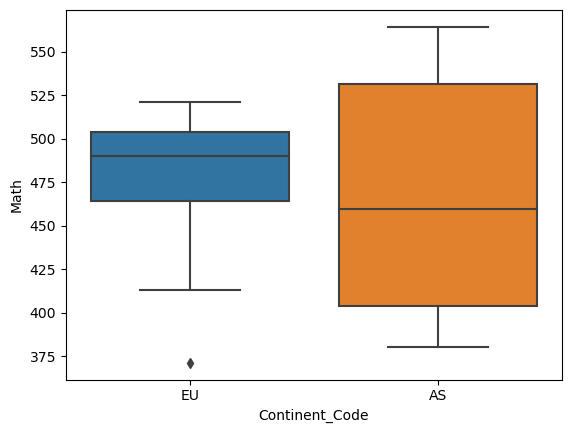

In [55]:
sns.boxplot(x='Continent_Code', y='Math', data =eu_as_data)

In [ ]:
#CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [64]:
#H0: mu1 = mu2
#H1: mu1 != mu2

In [69]:
eu_data = df[df['Continent_Code'] == 'EU']
as_data = df[df['Continent_Code'] == 'AS']

In [73]:
# Calculate test statistics using stats.ttest_ind()
t_statistic, p_value = ttest_ind(eu_data['Math'], as_data['Math'], equal_var=True)

In [74]:
t_statistic, p_value

(0.870055317967983, 0.38826888111307345)

In [80]:
# Decision
alpha = 0.05

if p_value < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null
